# basic table

In [9]:
import visualize.save_paper_things as spt
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from latexify import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
aggdf = pd.read_csv('data_clean/aggdf_depCDOTDWM_compFalse_max100_samp-1.csv')

In [19]:
aggdf.NumberDuplicates.max()

162

In [17]:
sns.histplot(aggdf.query("NumberDuplicates<90").NumberDuplicates, bins = 25)
plt.xlabel('Number of reports in observation period')
plt.ylabel('Incident count')
plt.yscale('log')
# plt.show()
saveimage('NumberReports_hist_chicago', extension = 'png', folder = 'plots/')

In [14]:
sns.histplot(aggdf.Duration, bins = 20)
plt.xlabel('Observation period length (Days)')
plt.ylabel('Incident count')
plt.yscale('log')
# plt.show()
saveimage('Duration_hist_chicago', extension = 'png', folder = 'plots/')

In [31]:
aggdf.Duration

0         4.979537
1         0.214051
2         1.223785
3         1.194063
4         1.964421
            ...   
575877    3.107546
575878    3.108032
575879    3.113553
575880    0.105752
575881    0.090127
Name: Duration, Length: 575882, dtype: float64

In [20]:
srcode = aggdf.groupby('SR_SHORT_CODE').SR_TYPE.first().reset_index()
srdict = dict(srcode.values)

In [21]:
dir_savefiles = 'stan_output/'
dir_plotoutput = 'plots/'

In [26]:
for duration in ['30', '100', '200']:
    filename = ('prettysumdf_chicago_basic_1010base{}').format(duration)
    print(filename)
    prettydf = pd.read_csv('{}{}.csv'.format(dir_savefiles, filename))

    prettydf.head()

    prettydf.R_hat = prettydf.R_hat.apply(lambda x: round(x, 1))
    for row in range(len(prettydf)):
        cur_name = prettydf.name[row]
        if 'SR_SHORT_CODE' in cur_name:
                srsc = cur_name.split('[')[1].split(']')[0]
                srty = srdict.get(srsc, srsc)
                prettydf.name[row] = 'Category[{}]'.format(srty)
    # prettydf.head()
    prettydf.set_index('name', inplace=True)
    prettydf.index.name = None
    prettydf=prettydf[['Mean','StdDev','R_hat']]
    prettydf.head()
    caption = 'Regression coefficients for Base variables in Chicago, for Max Duration {} days'.format(duration)
    prettydf.to_latex(os.path.join(dir_plotoutput, 'chicago_basic_{}.tex'.format(duration)), index = True, caption = caption)

prettysumdf_chicago_basic_1010base30
prettysumdf_chicago_basic_1010base100
prettysumdf_chicago_basic_1010base200


/var/folders/b5/k83788ts3wq6x9j771jlp4b00000gn/T/ipykernel_37496/2987114373.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prettydf.name[row] = 'Category[{}]'.format(srty)
/var/folders/b5/k83788ts3wq6x9j771jlp4b00000gn/T/ipykernel_37496/2987114373.py:21: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  prettydf.to_latex(os.path.join(dir_plotoutput, 'chicago_basic_{}.tex'.format(duration)), index = True, caption = caption)
/var/folders/b5/k83788ts3wq6x9j771jlp4b00000gn/T/ipykernel_37496/2987114373.py:14: SettingWithCopyWarning: 
A value is tryi

# spatial plot

In [1]:
from visualize import chicago_visualization
modelname = 'chicago_5smooth_1119sp_5_100k'
prettysumdf_filename = "stan_output/prettysumdf_{}.csv".format(modelname)
import pandas as pd
import matplotlib.pyplot as plt
prettysumdf = pd.read_csv(prettysumdf_filename)
centolambda = prettysumdf[prettysumdf.name.str.contains('census_tract')][['name', '50%']]
centolambda.loc[:,'census_tract'] = centolambda.loc[:,'name'].str.replace("census_tract",'').str.strip('[]')
centolambda = centolambda.rename(columns = {'50%': 'census_tract_coefficient'})
centolambda = centolambda.drop(columns = ['name'])
centolambda.describe()

,census_tract_coefficient
count,2235.000000
mean,0.000931
std,0.260970
min,-1.254330
25%,-0.152855
50%,-0.003975
75%,0.146155
max,1.332060


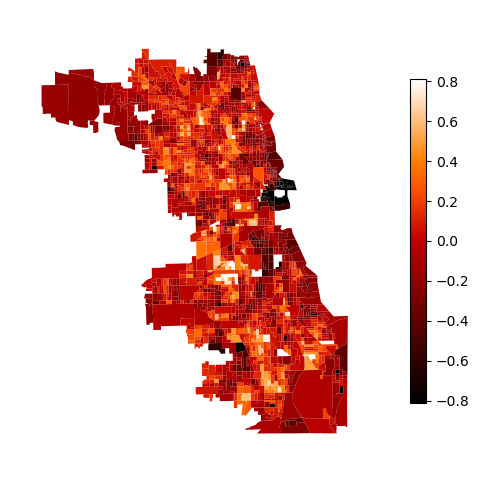

In [2]:

# chicago_visualization.plot_map_of_colors(new_ctl, tract_col="census_tract",hue_col="census_tract_coefficient")
chicago_visualization.plot_map_of_colors(centolambda, tract_col="census_tract",hue_col="census_tract_coefficient", vmin = -0.81, vmax = 0.81)
plt.savefig('plots/chicago_smooth.png', format='png',bbox_inches='tight')


# demographic table output

In [ ]:
import visualize.save_paper_things as spt

In [ ]:
census_variables = [ 'med_age',
       'frac_hispanic',
       'frac_white', 'frac_black'
     , 'frac_noHSGrad', 'frac_collegegrad', 'frac_poverty',
        'frac_renter', 'frac_single_unit',
       'avg_household_income', 'density']

In [ ]:
dir_savefiles = 'stan_output/'

In [ ]:
pretty_col_names = {
    'med_age': 'Median Age', 
    'frac_hispanic': 'Fraction Hispanic', 
    'frac_white': 'Fraction white', 
    'frac_black': 'Fraction Black', 
    'frac_noHSGrad': 'Fraction noHSGrad', 
    'frac_collegegrad': 'Fraction college grad', 
    'frac_poverty': 'Fraction poverty', 
    'frac_renter': 'Fraction renter', 
    'frac_single_unit': 'Fraction single unit', 
    'avg_household_income': 'Log(Avg income)', 
    'density': 'Log(Density)', 
}

In [ ]:
dictt = {
    '': [],
    'Mean': [],
    'StdDev': [],
    '5%': [],
    '50%': [],
    '95%': [],
}
for cenvar in census_variables:
    try:
        # covnameloc = covname.format(cenvar)
        filename = ('prettysumdf_chicago_demographic_1010demo{}').format(cenvar)
        # print(filename)
        prettydf = pd.read_csv('{}{}.csv'.format(dir_savefiles, filename))
        # print(list(prettydf.name))
        row = prettydf.query('name == @cenvar').iloc[0]
        print(cenvar, row['50%'], '({},{})'.format(row['5%'], row['95%']))
        dictt[''].append(pretty_col_names.get(cenvar, cenvar))
        dictt['Mean'].append(row['Mean'])
        dictt['StdDev'].append(row['StdDev'])
        dictt['5%'].append(row['5%'])
        dictt['95%'].append(row['95%'])
        dictt['50%'].append(row['50%'])
    except Exception as e:
        # print(e)
        print(e, 'failed on {}'.format(cenvar))

unidf = pd.DataFrame(dictt)
unidf

In [ ]:
dir_plotoutput = "plots/"

In [ ]:
caption = 'Census Tract Demographic coefficients'
unidf.to_latex(os.path.join(dir_plotoutput, '{}_unicoefsequity_full.tex'.format("demoplot")), index = False, caption = caption)

# temporal plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


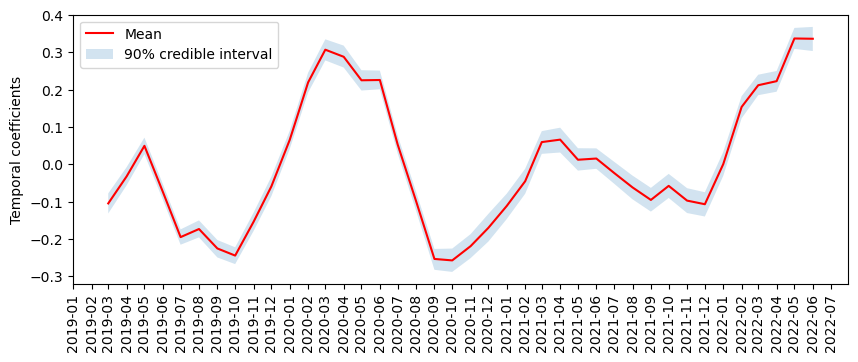

In [15]:
modelname = 'chicago_time_autoregressive_zerosum_1110time025'
prettysumdf_filename = "stan_output/prettysumdf_{}.csv".format(modelname)
import pandas as pd
import matplotlib.pyplot as plt
sumdf = pd.read_csv(prettysumdf_filename)

import seaborn as sns
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format. Will be clear later

temp = sumdf.loc[sumdf.name.str.contains('CreatedDate'),['name','Mean', '5%', '95%']]
temp.loc[:, 'name'] = temp.loc[:, 'name'].apply(lambda x: x.split('[')[1].split(']')[0])
temp.loc[:, 'Month'] = pd.to_datetime(temp.name).dt.to_period('M')
temp.to_csv('temporal_results.csv', index=False)

plotdf = pd.read_csv('temporal_results.csv', index_col='Month', parse_dates = True)

fig, axes = plt.subplots(figsize=(10,3.5))
sns.lineplot(data = plotdf['Mean'], label='Mean', color = 'red')

axes.xaxis.set_major_locator(months)
axes.xaxis.set_major_formatter(years_fmt)
axes.xaxis.set_minor_locator(months)

plt.fill_between(plotdf.index, plotdf['5%'], plotdf['95%'], alpha=0.2, label='90% credible interval')

plt.ylabel('Temporal coefficients')
plt.legend()
plt.xticks(rotation = 90)
plt.savefig('plots/chicago_seasonal_line.eps', format='eps',bbox_inches='tight')
plt.show()

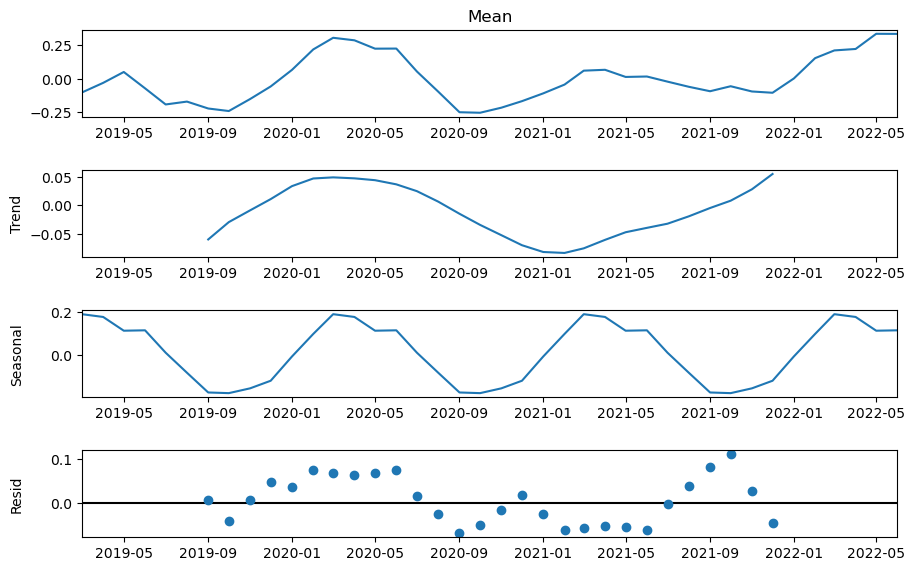

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
analysis_df = pd.read_csv('temporal_results.csv', index_col='Month', parse_dates = True)
analysis_df = analysis_df['Mean']
decompose_result_mult = seasonal_decompose(analysis_df, model="additive", period=12)
fig = decompose_result_mult.plot()
fig.set_size_inches(10, 6)
fig.align_labels()
plt.show()
fig.savefig('plots/chicago_seasonal_decomp.eps', format='eps',bbox_inches='tight')